# Laborator 2

In [1]:
# Downloadam datele
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
!unzip data_MNIST.zip

--2021-04-15 14:13:39--  https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data_MNIST.zip’

data_MNIST.zip      100%[===================>] 614,89K  --.-KB/s    in 0,1s    

2021-04-15 14:13:39 (4,14 MB/s) - ‘data_MNIST.zip’ saved [629644/629644]

Archive:  data_MNIST.zip
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


In [79]:
# Importing np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [84]:
# Importing training data
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.array(np.loadtxt('data/train_labels.txt'), dtype="int")

testing_images = np.loadtxt('data/test_images.txt')
testing_labels = np.array(np.loadtxt('data/test_labels.txt'), dtype="int")

4


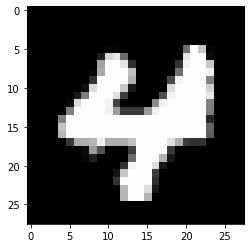

In [85]:
# Displaying an image
image = train_images[0] # prima imagine
image = np.reshape(image, (28, 28))
print(train_labels[0])
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

## Training with 5 bins

In [86]:
# Discretizarea datelor
bins = np.linspace(0, 256, num=5)

train_images_bin = np.digitize(train_images, bins) - 1
testing_images_bin = np.digitize(testing_images, bins) - 1

In [87]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_images_bin, train_labels)
prediction = naive_bayes_model.predict(testing_images_bin)
naive_bayes_model.score(testing_images_bin, testing_labels)

0.836

## Looking for best number of bins

In [88]:
for b in range(3, 20):
    # Discretizarea datelor
    bins = np.linspace(0, 256, num=b)

    train_images_bin = np.digitize(train_images, bins) - 1
    testing_images_bin = np.digitize(testing_images, bins) - 1
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(train_images_bin, train_labels)

    print(f"For bins = {b}, score is {naive_bayes_model.score(testing_images_bin, testing_labels)}")

For bins = 3, score is 0.83
For bins = 4, score is 0.84
For bins = 5, score is 0.836
For bins = 6, score is 0.838
For bins = 7, score is 0.842
For bins = 8, score is 0.842
For bins = 9, score is 0.842
For bins = 10, score is 0.842
For bins = 11, score is 0.842
For bins = 12, score is 0.842
For bins = 13, score is 0.842
For bins = 14, score is 0.842
For bins = 15, score is 0.842
For bins = 16, score is 0.842
For bins = 17, score is 0.842
For bins = 18, score is 0.842
For bins = 19, score is 0.842


## Misclassifications 

In [89]:
# Discretizarea datelor
bins = np.linspace(0, 256, num=5)

train_images_bin = np.digitize(train_images, bins) - 1
testing_images_bin = np.digitize(testing_images, bins) - 1

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_images_bin, train_labels)

prediction = naive_bayes_model.predict(testing_images_bin)

misclassified_indices = np.where(testing_labels != prediction)[0]

Predicted label: 8, good label: 5


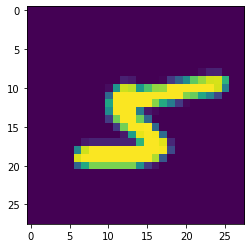

Predicted label: 0, good label: 6


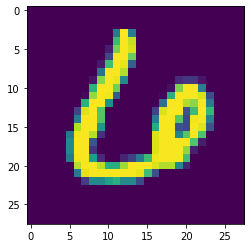

Predicted label: 9, good label: 4


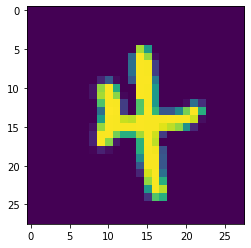

Predicted label: 9, good label: 7


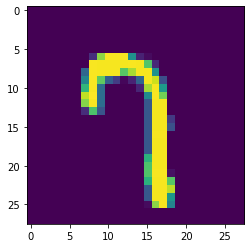

Predicted label: 3, good label: 2


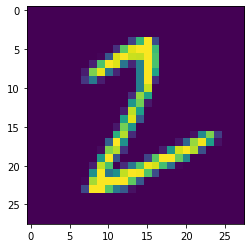

Predicted label: 8, good label: 1


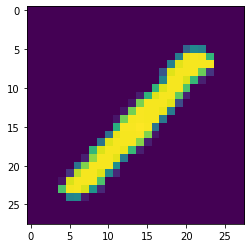

Predicted label: 9, good label: 3


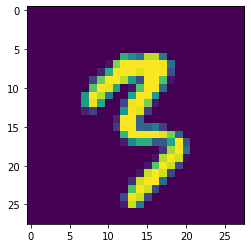

Predicted label: 8, good label: 1


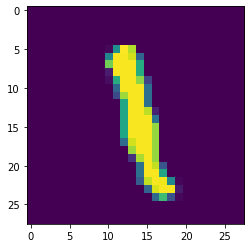

Predicted label: 8, good label: 6


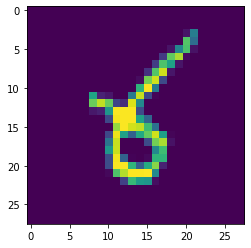

Predicted label: 4, good label: 9


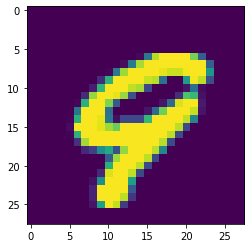

In [92]:
for i in misclassified_indices[:10]:
    print(f"Predicted label: {prediction[i]}, good label: {testing_labels[i]}")
    plt.imshow(testing_images[i].reshape((28, 28)))
    plt.show()

## Compute the Confusion Matrix

In [93]:
def confusion_matrix(predicted, real):
    num_labels = real.max() + 1
    mat = np.zeros((num_labels, num_labels))
    for i in range(len(predicted)):
        mat[predicted[i]][real[i]] += 1
    return mat

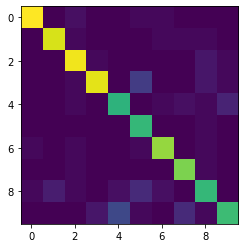

In [94]:
mat = confusion_matrix(prediction, testing_labels)
plt.imshow(mat)